In [116]:
import os
import tensorboard as tb
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import re
from dataclasses import make_dataclass
import seaborn as sns

In [157]:
ExperimentRecord = make_dataclass('ExperimentRecord', [('optimizer', str), ('learning_rate', float), ("experiment", str), ('epoch', int), ('value', float), ('tag', str)])
Record = make_dataclass('Record', [('epoch', int), ('value', float), ('tag', str)])
def load_data(path, metric, optimizer=None, lr=None, as_df=True):
    tags = {
        "accuracy": ['Accuracy/test_10m','Accuracy/test_100m','Accuracy/test_500m','Accuracy/test_1km', 'Accuracy/test_5km'],
        "loss": ['Loss/train', 'Loss/validation']
    }
    
    tag_map = {'Accuracy/test_10m': "Accuracy 10m",
               'Accuracy/test_100m': "Accuracy 100m",
               'Accuracy/test_500m': "Accuracy 500m",
               'Accuracy/test_1km': "Accuracy 1km", 
               'Accuracy/test_5km': "Accuracy 5km", 
               "Loss/train": "Training loss", 
               'Loss/validation': "Validation loss"
              }
    event = EventAccumulator(path=path)
    event.Reload()

    data = []
        
    for tag in tags[metric]:
        for scalar in event.Scalars(tag):
            if optimizer is not None and lr is not None:
                experiment_tag = f"{optimizer}-{lr}"
                data.append(ExperimentRecord(optimizer, lr, experiment_tag, scalar.step, scalar.value, tag_map[tag]))
            else:
                data.append(Record(scalar.step, scalar.value, tag_map[tag]))
    
    if as_df:
        return pd.DataFrame(data)
    else:
        return data

def load_datafrom_multiple_runs(path, metric):
    experiments = [os.path.join(path, subdir) for subdir in os.listdir(path)]
    data = []
    for experiment in os.listdir(path):
        experiment_path = os.path.join(path,experiment)
        
        m = re.search(r'(Adam|SGD)-lr-(\d+([.]\d*)?(e[+-]?\d+)?)-', experiment)
        optimizer = m.group(1)
        lr = float(m.group(2))
        data.extend(load_data(experiment_path, metric, optimizer, lr, as_df=False))

    return pd.DataFrame(data)

# 2 layer network on top 70 dataset

In [192]:
path = "/home/andrew/Documents/study/thesis/thesis-src/experiments/parameter_tuning/V2_0__tune_v1_2_net_on_top70_ds/runs"
loss_data = load_datafrom_multiple_runs(path, 'loss')
accuracy_data = load_datafrom_multiple_runs(path, 'accuracy')

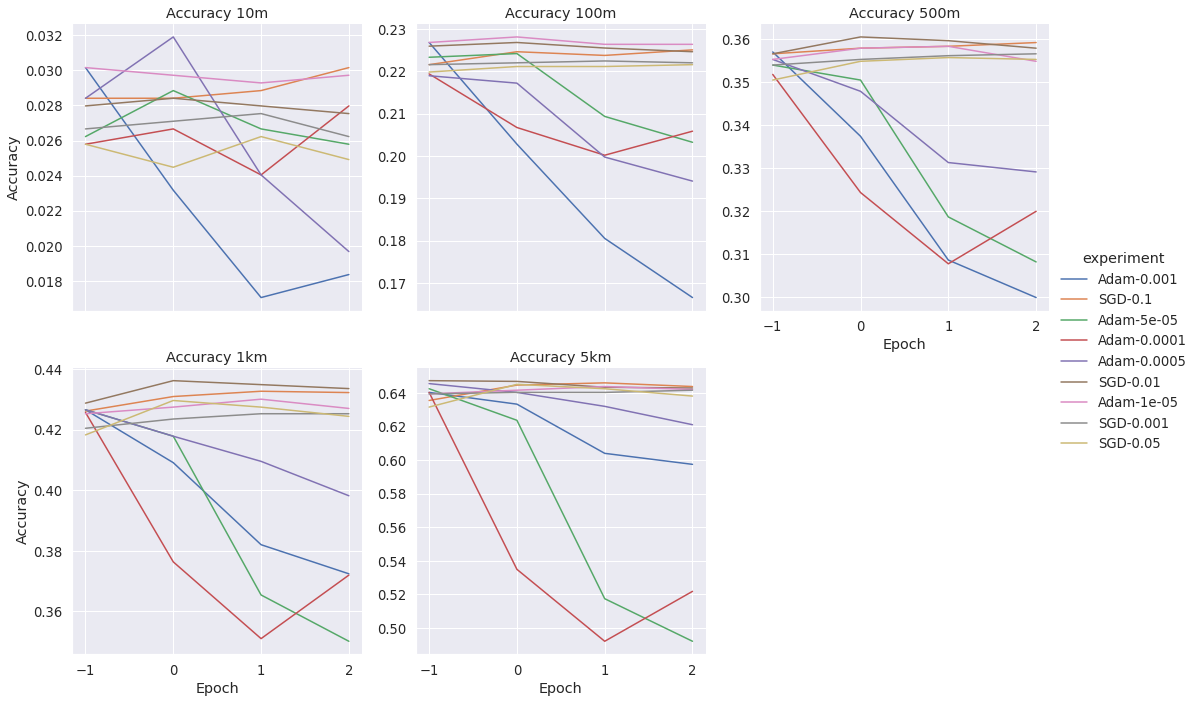

In [193]:
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
g=sns.relplot(
    data=accuracy_data, x="epoch", y="value", col="tag",
    hue="experiment", kind="line", facet_kws= {'sharey': False}, col_wrap=3
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Accuracy', x_var='Epoch')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[-1, 0, 1, 2])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v1_2_net_tuning_on_top70ds.eps', format='eps',bbox_inches='tight')

In [194]:
acc_wo_adam = accuracy_data[~accuracy_data['experiment'].isin(['Adam-5e-05','Adam-0.0001','Adam-0.0005', 'Adam-0.001'])]
acc_adam = accuracy_data[accuracy_data['experiment'].isin(['Adam-5e-05','Adam-0.0001','Adam-0.0005', 'Adam-0.001'])]

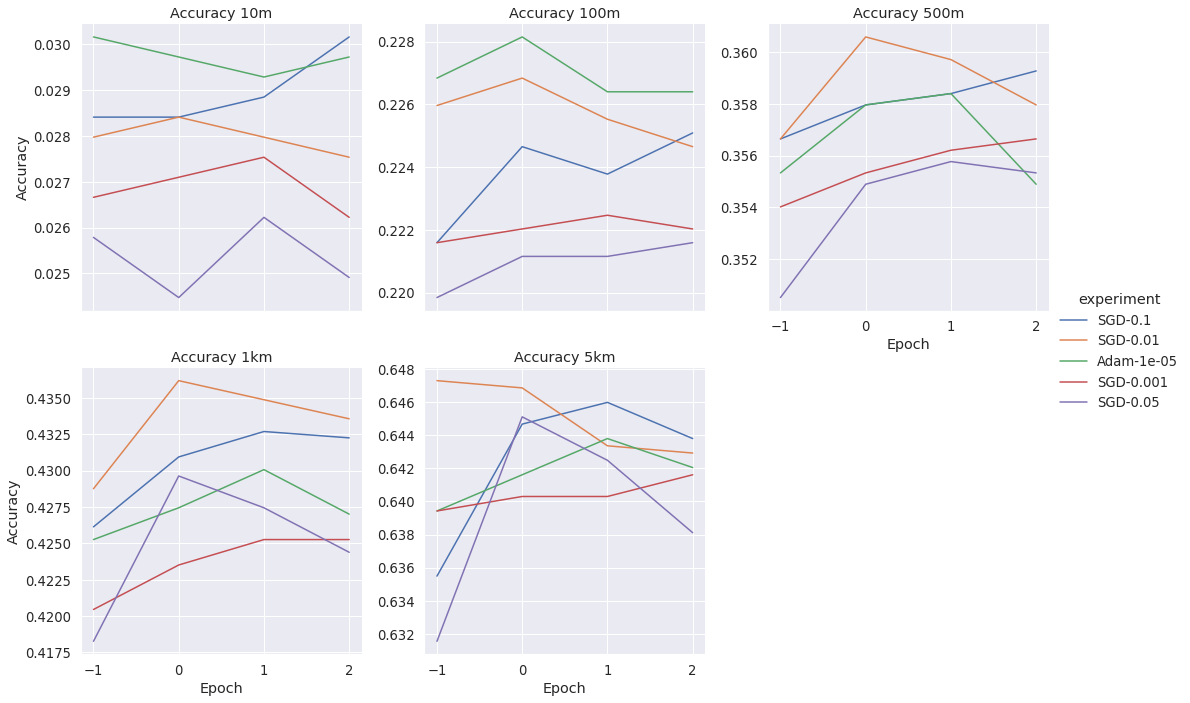

In [195]:
g=sns.relplot(
    data=acc_wo_adam, x="epoch", y="value", col="tag",
    hue="experiment", kind="line", facet_kws= {'sharey': False}, col_wrap=3
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Accuracy', x_var='Epoch')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[-1, 0, 1, 2])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v1_2_net_tuning_on_top70ds_wo_outliers.eps', format='eps',bbox_inches='tight')

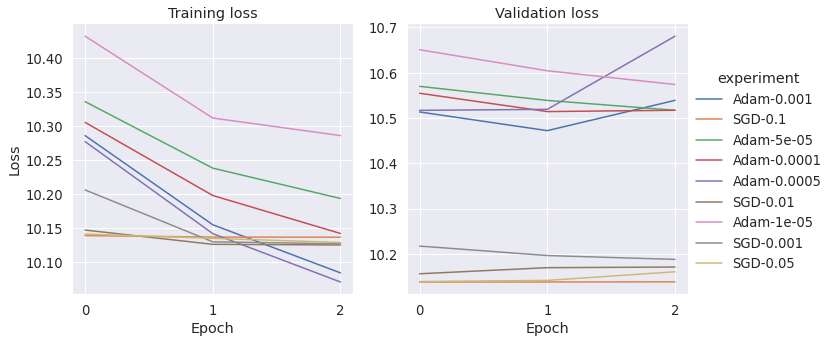

In [196]:
g = sns.relplot(
    data=loss_data, x="epoch", y="value", col="tag",
    hue="experiment", kind="line", facet_kws= {'sharey': False, 'sharex':False}
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Loss', x_var='Epoch')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[0, 1, 2])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v1_2_net_tuning_on_top70ds_losses.eps', format='eps',bbox_inches='tight')

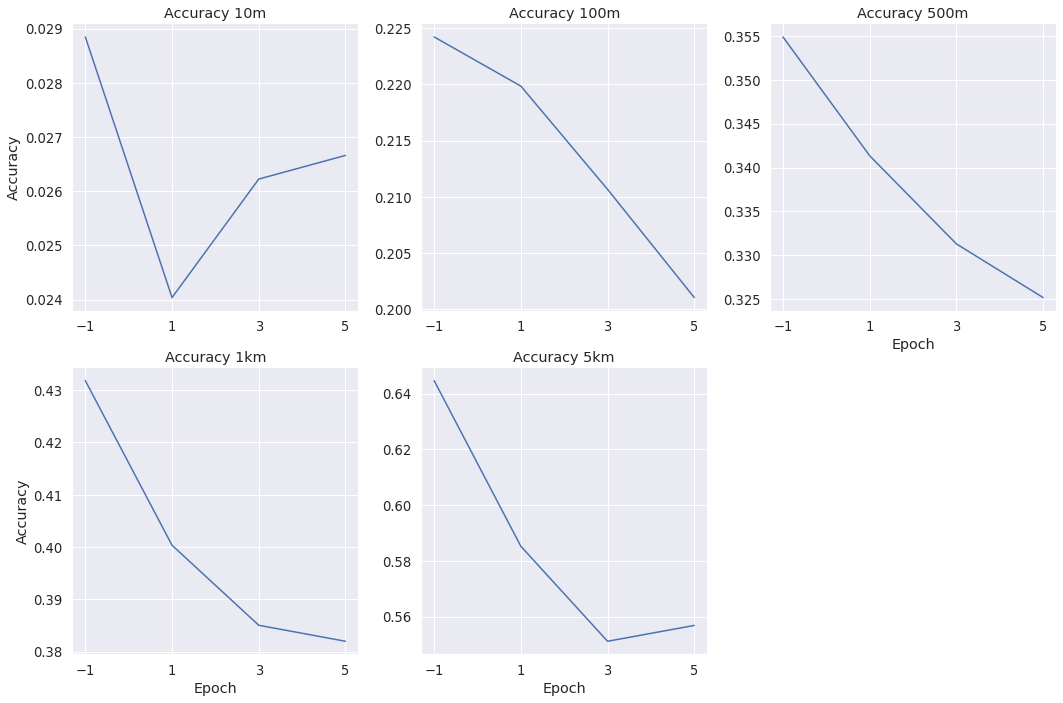

In [197]:
path = "/home/andrew/Documents/study/thesis/thesis-src/experiments/training/V4_1__train_v1_2_on_top70_ds/runs"
run_acc = load_data(path, 'accuracy')
run_loss = load_data(path, 'loss')

g = sns.relplot(
    data=run_acc, x="epoch", y="value", col="tag",
    kind="line", facet_kws= {'sharey': False, 'sharex':False}, col_wrap=3
)
g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Accuracy', x_var='Epoch')
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[-1, 1, 3, 5])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v1_2_net_training_on_top70ds.eps', format='eps',bbox_inches='tight')

# V1_2 on intersection ds

In [211]:
path = "/home/andrew/Documents/study/thesis/thesis-src/experiments/parameter_tuning/V3_0__tune_v1_2_net_on_intersection_ds/runs"
loss_data = load_datafrom_multiple_runs(path, 'loss')
accuracy_data = load_datafrom_multiple_runs(path, 'accuracy')

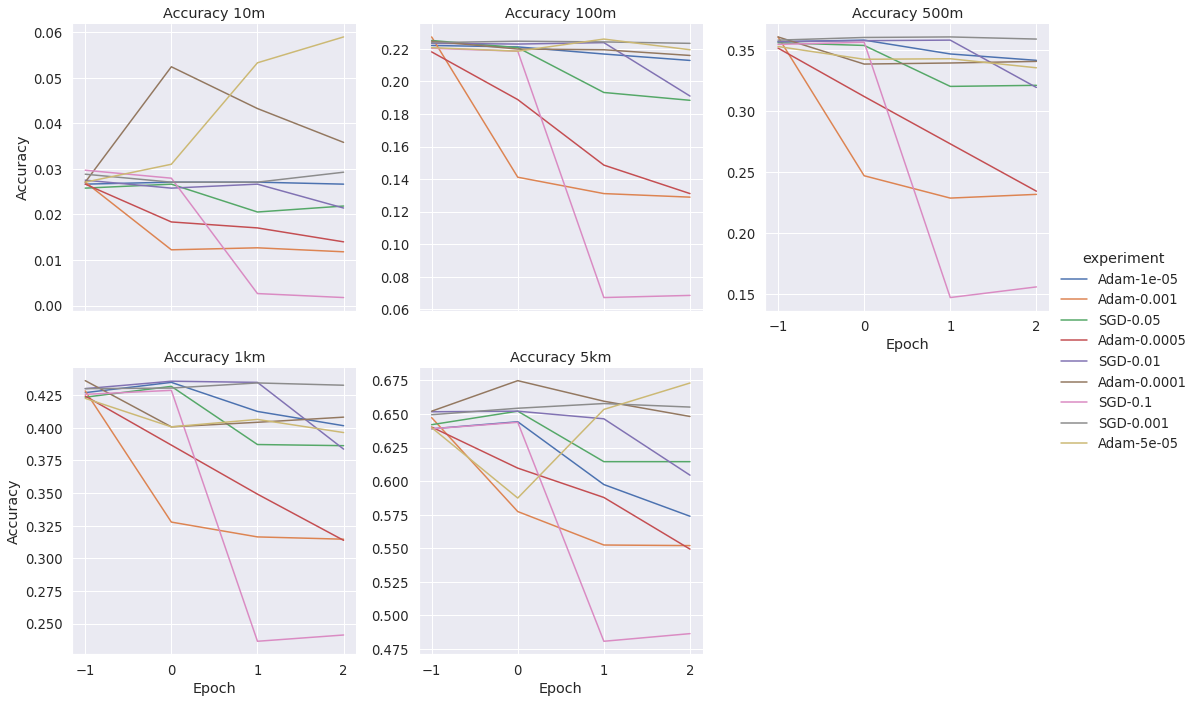

In [199]:
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
g=sns.relplot(
    data=accuracy_data, x="epoch", y="value", col="tag",
    hue="experiment", kind="line", facet_kws= {'sharey': False}, col_wrap=3
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Accuracy', x_var='Epoch')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[-1, 0, 1, 2])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v1_2/intersection/v1_2_net_tuning_on_intersection_ds.eps', format='eps',bbox_inches='tight')

In [200]:
acc_wo_outliers = accuracy_data[~accuracy_data['experiment'].isin(['SGD-0.1','Adam-0.0005', 'Adam-0.001'])]

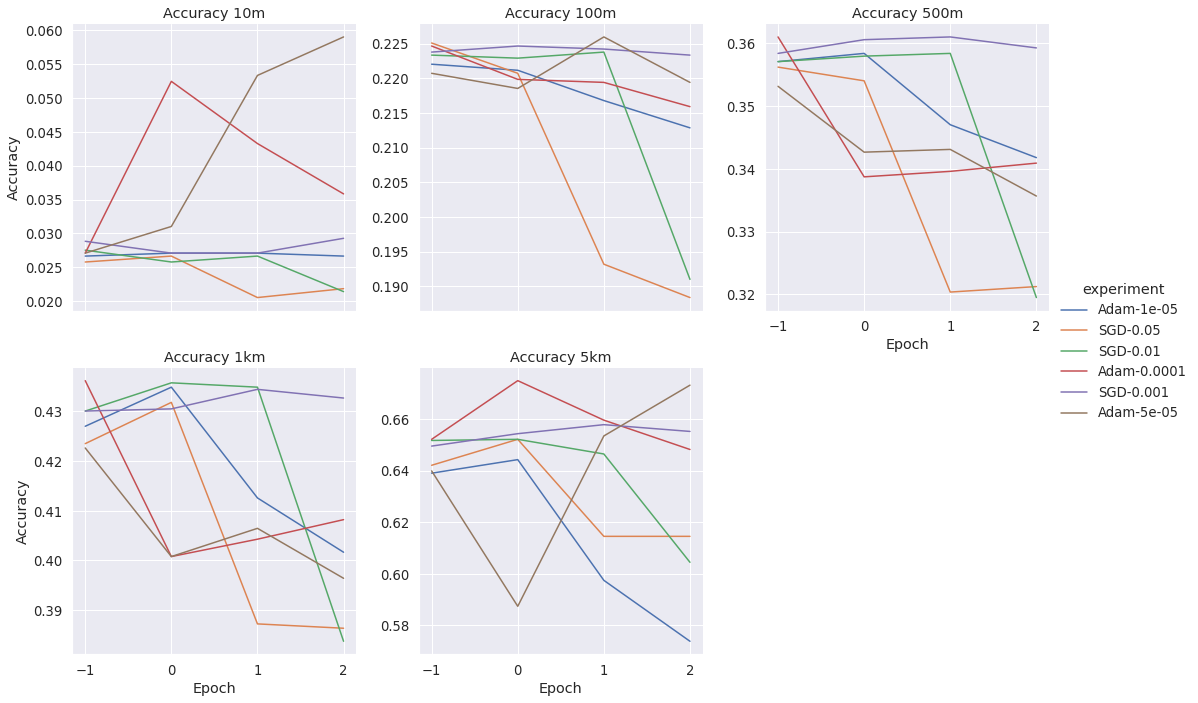

In [201]:
g=sns.relplot(
    data=acc_wo_outliers, x="epoch", y="value", col="tag",
    hue="experiment", kind="line", facet_kws= {'sharey': False}, col_wrap=3
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Accuracy', x_var='Epoch')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[-1, 0, 1, 2])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v1_2_net_tuning_on_intersection_ds_wo_outliers.eps', format='eps',bbox_inches='tight')

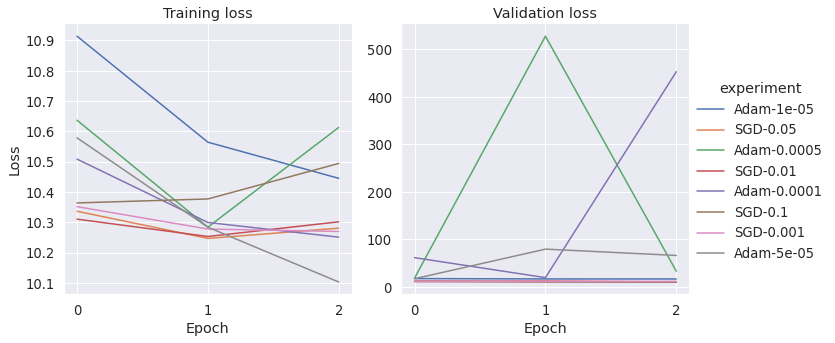

In [202]:
loss_data = loss_data[loss_data['experiment']!= 'Adam-0.001']
g = sns.relplot(
    data=loss_data, x="epoch", y="value", col="tag",
    hue="experiment", kind="line", facet_kws= {'sharey': False, 'sharex':False}
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Loss', x_var='Epoch')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[0, 1, 2])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v1_2_net_tuning_on_intersection_ds_loss.eps', format='eps',bbox_inches='tight')

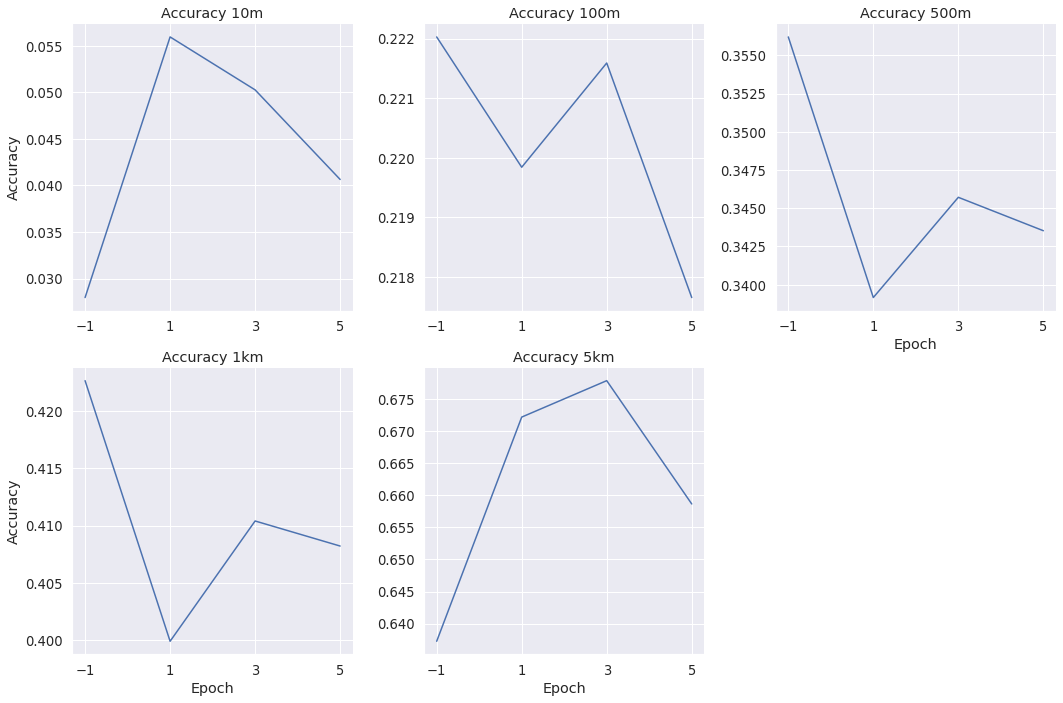

In [203]:
path = "/home/andrew/Documents/study/thesis/thesis-src/experiments/training/V5_0__train_v1_2_on_intersection_adam/runs"
run_acc = load_data(path, 'accuracy')
run_loss = load_data(path, 'loss')

g = sns.relplot(
    data=run_acc, x="epoch", y="value", col="tag",
    kind="line", facet_kws= {'sharey': False, 'sharex':False}, col_wrap=3
)
g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Accuracy', x_var='Epoch')
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[-1, 1, 3, 5])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v1_2_net_training_on_intersection_ds.eps', format='eps',bbox_inches='tight')

# V0_2 on top70 ds

In [204]:
path = "/home/andrew/Documents/study/thesis/thesis-src/experiments/parameter_tuning/V1_0__tune_v0_2_net_on_top_70_ds/runs"
loss_data = load_datafrom_multiple_runs(path, 'loss')
accuracy_data = load_datafrom_multiple_runs(path, 'accuracy')

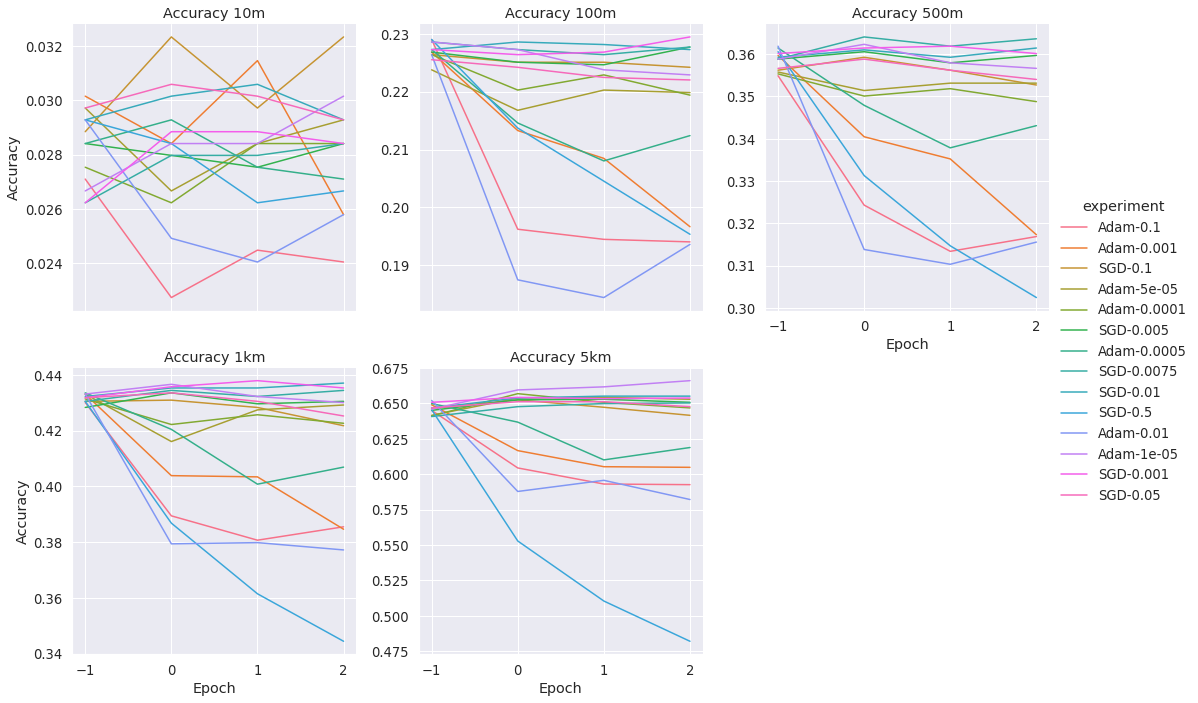

In [205]:
g=sns.relplot(
    data=accuracy_data, x="epoch", y="value", col="tag",
    hue="experiment", kind="line", facet_kws= {'sharey': False}, col_wrap=3
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Accuracy', x_var='Epoch')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[-1, 0, 1, 2])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v0_2_net_tuning_on_top70_ds.eps', format='eps',bbox_inches='tight')

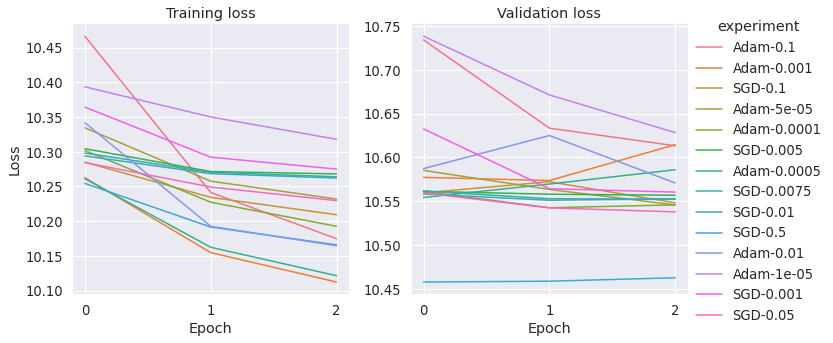

In [208]:
g = sns.relplot(
    data=loss_data, x="epoch", y="value", col="tag",
    hue="experiment", kind="line", facet_kws= {'sharey': False, 'sharex':False}
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Loss', x_var='Epoch')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[0, 1, 2])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v0_2_net_tuning_on_top70_ds_losses.eps', format='eps',bbox_inches='tight')

In [207]:
acc_wo_outliers = accuracy_data[~accuracy_data['experiment'].isin(['SGD-0.5','Adam-0.0005', 'Adam-0.001', 'Adam-0.1', 'Adam-0.01'])]

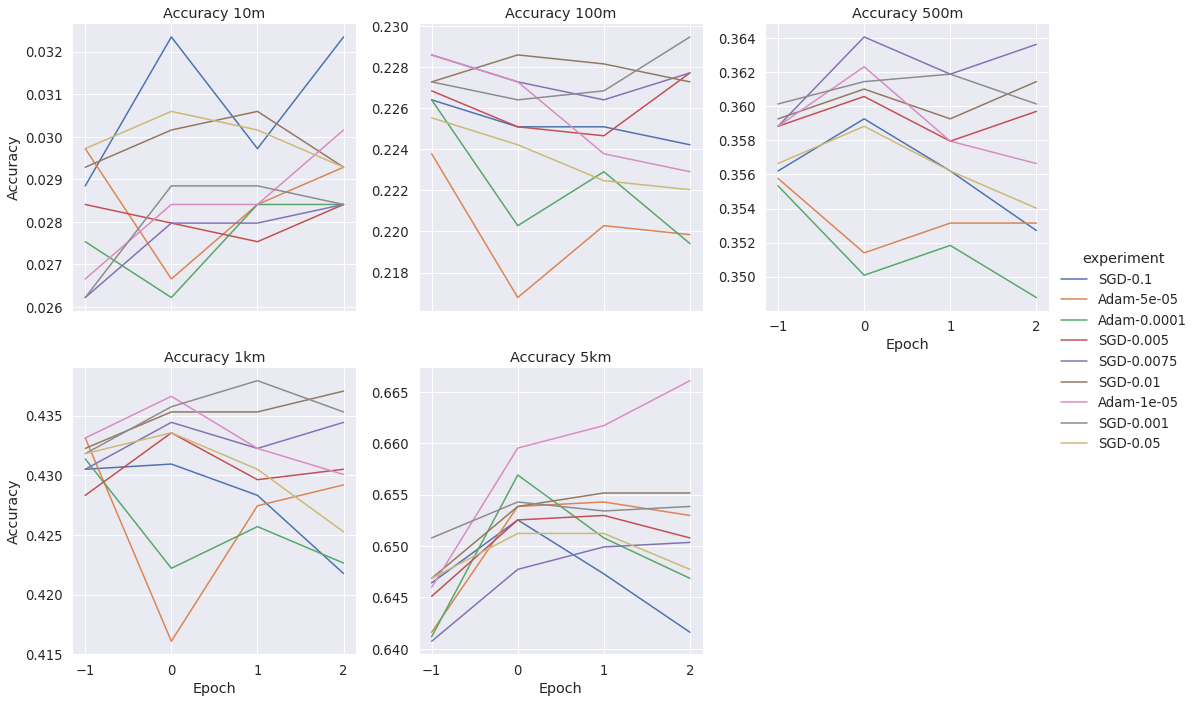

In [209]:
g=sns.relplot(
    data=acc_wo_outliers, x="epoch", y="value", col="tag",
    hue="experiment", kind="line", facet_kws= {'sharey': False}, col_wrap=3
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Accuracy', x_var='Epoch')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[-1, 0, 1, 2])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v0_2_net_tuning_on_top70_ds_wo_outliers.eps', format='eps',bbox_inches='tight')

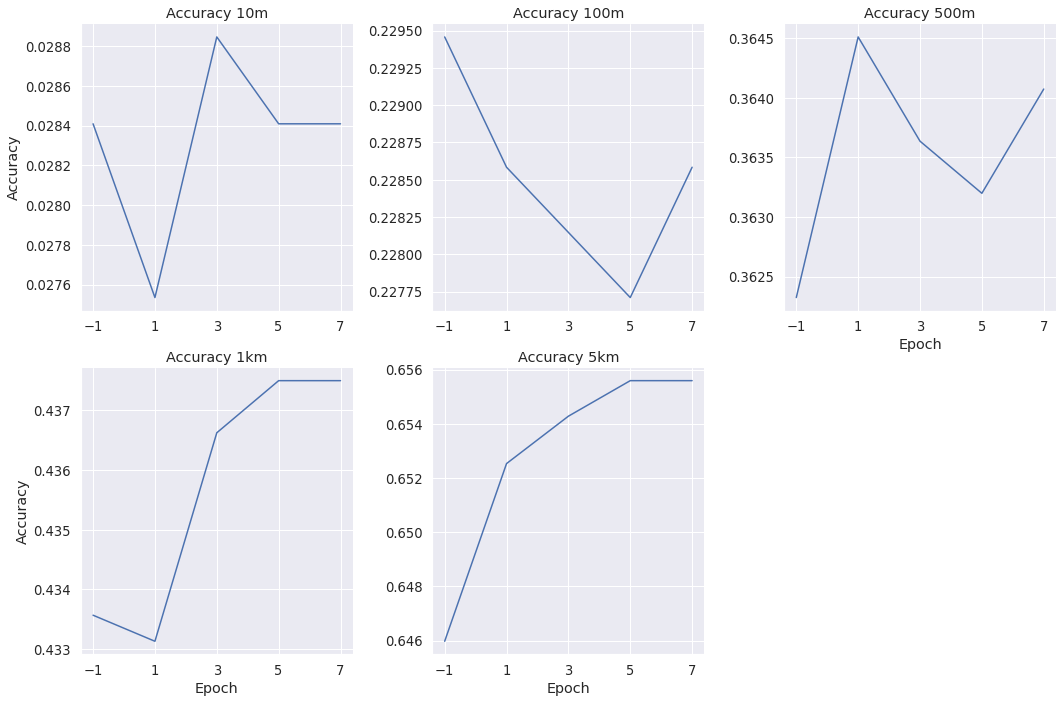

In [210]:

path = "/home/andrew/Documents/study/thesis/thesis-src/experiments/training/V1_0__train_v0_2_net_on_v2_0_ds/runs"
run_acc = load_data(path, 'accuracy')
run_loss = load_data(path, 'loss')

g = sns.relplot(
    data=run_acc, x="epoch", y="value", col="tag",
    kind="line", facet_kws= {'sharey': False, 'sharex':False}, col_wrap=3
)
g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Accuracy', x_var='Epoch')
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[-1, 1, 3, 5, 7])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v0_2_net_training_on_top70_ds.eps', format='eps',bbox_inches='tight')

# V0_2 on intersection

In [216]:
path = "/home/andrew/Documents/study/thesis/thesis-src/experiments/parameter_tuning/V4_0__tune_v0_2_on_intersection/runs"
loss_data = load_datafrom_multiple_runs(path, 'loss')
accuracy_data = load_datafrom_multiple_runs(path, 'accuracy')

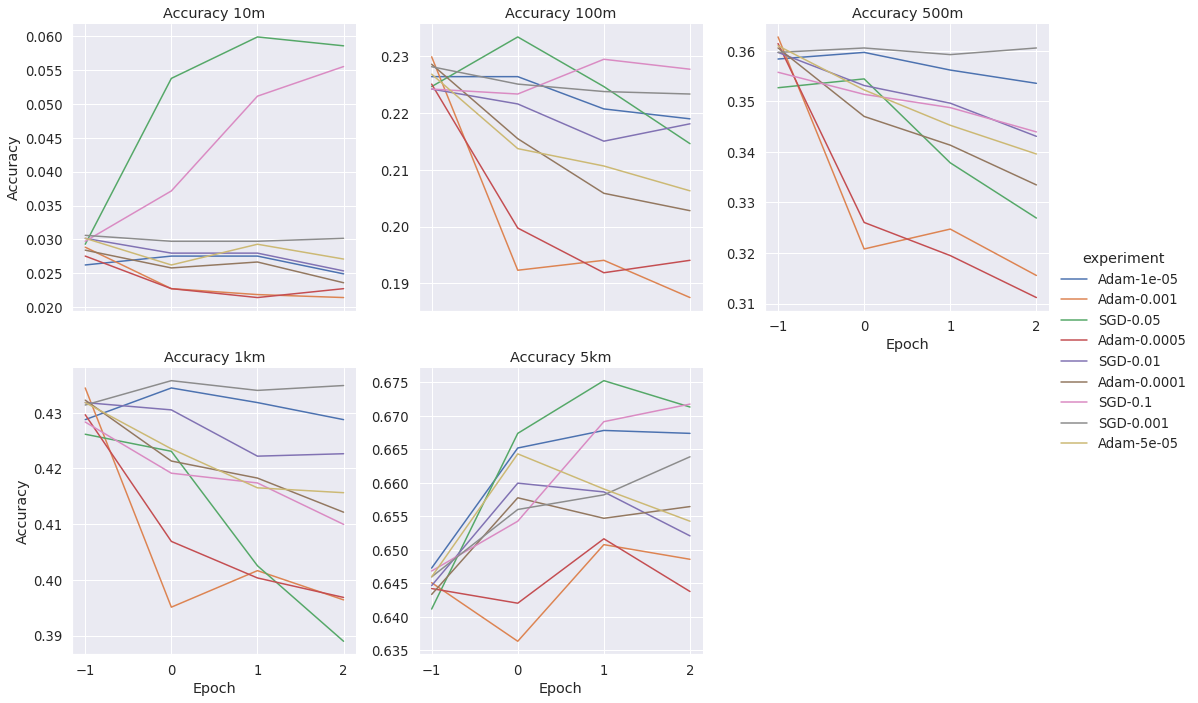

In [217]:
g=sns.relplot(
    data=accuracy_data, x="epoch", y="value", col="tag",
    hue="experiment", kind="line", facet_kws= {'sharey': False}, col_wrap=3
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Accuracy', x_var='Epoch')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[-1, 0, 1, 2])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v0_2/intersection/v0_2_net_tuning_on_intersection_ds.eps', format='eps',bbox_inches='tight')

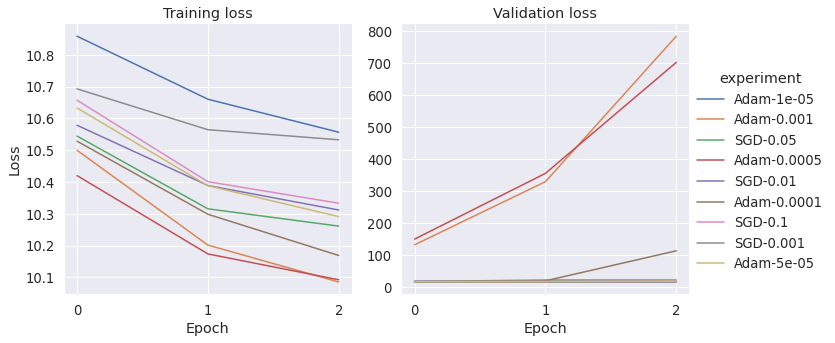

In [218]:
g = sns.relplot(
    data=loss_data, x="epoch", y="value", col="tag",
    hue="experiment", kind="line", facet_kws= {'sharey': False, 'sharex':False}
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Loss', x_var='Epoch')

for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[0, 1, 2])
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v0_2/intersection/v0_2_net_tuning_on_intersection_ds_losses.eps', format='eps',bbox_inches='tight')

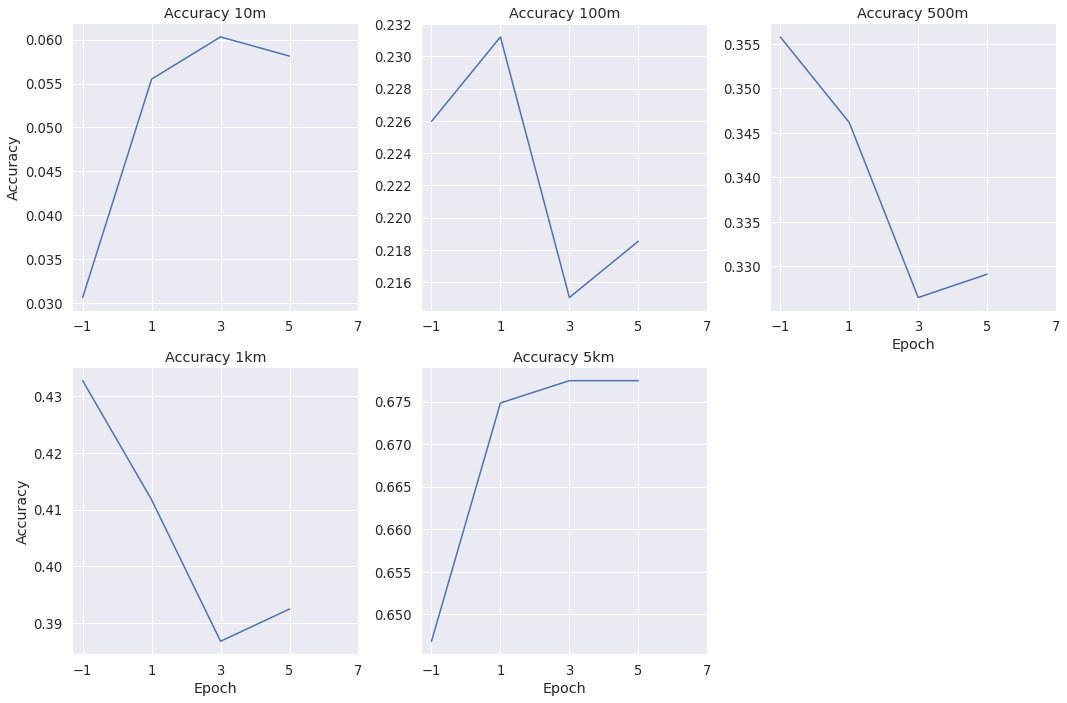

In [214]:
path = "/home/andrew/Documents/study/thesis/thesis-src/experiments/training/V1_2_train_v0_2_on_intersection_sgd_05/runs"
run_acc = load_data(path, 'accuracy')
run_loss = load_data(path, 'loss')

g = sns.relplot(
    data=run_acc, x="epoch", y="value", col="tag",
    kind="line", facet_kws= {'sharey': False, 'sharex':False}, col_wrap=3
)
g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Accuracy', x_var='Epoch')
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[-1, 1, 3, 5, 7])
    
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v0_2/intersection/v0_2_net_training_on_intersection_ds.eps', format='eps',bbox_inches='tight')

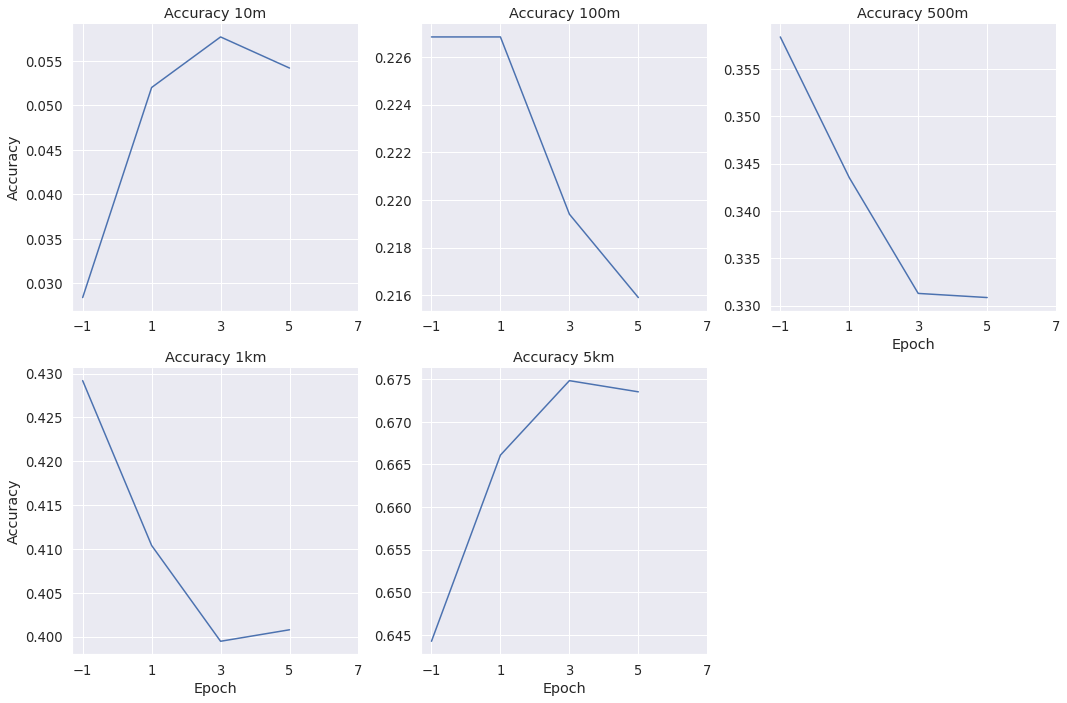

In [215]:
path = "/home/andrew/Documents/study/thesis/thesis-src/experiments/training/v1_3__train_v0_2_on_intersection_sgd_1/runs"
run_acc = load_data(path, 'accuracy')
run_loss = load_data(path, 'loss')

g = sns.relplot(
    data=run_acc, x="epoch", y="value", col="tag",
    kind="line", facet_kws= {'sharey': False, 'sharex':False}, col_wrap=3
)
g.set_titles(col_template="{col_name}")
g.set_axis_labels(y_var='Accuracy', x_var='Epoch')
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=[-1, 1, 3, 5, 7])
    
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/5-custom-model/experiments/v0_2/intersection/v0_2_net_training_on_intersection_ds_sdg_1.eps', format='eps',bbox_inches='tight')